# Plotting Mortgages

In [12]:
import pylab

def findPayment(loan, r, m):
    """Assumes: Loan and r are floats, m an int
    Returns the monthly payment for a mortage of size
    loan at a a monthly rate of r for m months
    """
    return loan*((r*(1+r)**m)/((1+r)**m-1))

class Mortgage(object):
    """Abstrac class for building different kinds of mortgages"""
    def __init__(self, loan, annRate, months) -> None:
        """Assumes: loand and annRate are floats, months an int
        Creates a new Mortgage of size loan, duration months, and annual rate annRate
        """
        self.loan = loan 
        self.rate = annRate/12
        self.months = months 
        self.paid = [0.0]
        self.outstanding = [loan]
        self.payment = findPayment(loan, self.rate, months)
        self.legend = None # Description of Mortgage
        
    def makePayment(self):
        """Make a Payment"""
        self.paid.append(self.payment)
        reduction = self.payment - self.outstanding[-1]*self.rate
        self.outstanding.append(self.outstanding[-1] - reduction)
        
    def getTotalPaid(Self):
        """Return the total amount paid so far"""
        return sum(Self.paid)
    
    def __str__(self):
        return self.legend
    
    def plotPayments(self, style):
        pylab.plot(self.paid[1:], style, label = self.legend)
        
    def plotBalance(self, style):
        pylab.plot(self.outstanding, style, label = self.legend)
        
    def plotTotPd(self, style):
        """The method plotTotPd simply plots 
        the cumulative total of the payments made."""
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd.append(totPd[-1] + self.paid[i])
        pylab.plot(totPd, style, label = self.legend)
        
    def plotNet(self, style):
        """The method plotNet plots 
        an approximation to the total cost 
        of the mortgage over time 
        by plotting the cash expended minus 
        the equity acquired by paying off part of the loan."""
        totPd = [self.paid[0]]
        for i in range(1,len(self.paid)):
            totPd.append(totPd[-1] + self.paid[i])
        equityAcquired = pylab.array([self.loan] * \
            len(self.outstanding))
        equityAcquired = equityAcquired - \
            pylab.array(self.outstanding)
        net = pylab.array(totPd) - equityAcquired
        pylab.plot(net, style, label = self.legend)
        
        

In [13]:
class Fixed(Mortgage):
    def __init__(self, loan, r, months) -> None:
        Mortgage.__init__(self, loan, r, months)
        self.legend = 'Fixed, ' + str(round(r*100,2)) + '%'
        
class FixedWithPts(Mortgage):
    def __init__(self, loan, r, months, pts) -> None:
        Mortgage.__init__(self, loan, r, months)
        self.pts = pts
        self.paid = [loan*(pts/100)]
        self.legend = 'Fixed, ' + str(round(r*100,2)) + '%, '\
            + str(pts) + ' points'
            
class TwoRate(Mortgage):
    def __init__(self, loan, r, months, teaserRate, teaserMonths) -> None:
        Mortgage.__init__(self, loan, teaserRate, months)
        self.teaserMonths = teaserMonths
        self.teaserRate = teaserRate
        self.nextRate = r/12
        self.legend = str(teaserRate*100)\
            + '% for ' + str(self.teaserMonths)\
                + ' months, then ' + str(round(r*100,2)) + '%'
    def makePayment(self):
        if len(self.paid) == self.teaserMonths + 1:
            self.rate = self.nextRate
            self.payment = findPayment(self.outstanding[-1],
                                       self.rate,
                                       self.months - self.teaserMonths)
        Mortgage.makePayment(self)

In [14]:
def plotMortgages(morts, amt):
    def labelPlot(figure, title, xLabel, yLabel):
        pylab.figure(figure)
        pylab.title(title)
        pylab.xlabel(xLabel)
        pylab.ylabel(yLabel)
        pylab.legend(loc = 'best')
    styles = ['k-', 'k-.', 'k:']
    #Give names to figure numbers
    payments, cost, balance, netCost = 0, 1, 2, 3
    for i in range(len(morts)):
        pylab.figure(payments)
        morts[i].plotPayments(styles[i])
        pylab.figure(cost)
        morts[i].plotTotPd(styles[i])
        pylab.figure(balance)
        morts[i].plotBalance(styles[i])
        pylab.figure(netCost)
        morts[i].plotNet(styles[i])
    labelPlot(payments, 'Monthly Payments of $' + str(amt) +
              ' Mortgages', 'Months', 'Monthly Payments')
    labelPlot(cost, 'Cash Outlay of $' + str(amt) +
              ' Mortgages', 'Months', 'Total Payments')
    labelPlot(balance, 'Balance Remaining of $' + str(amt) +
              ' Mortgages', 'Months', 'Remaining Loan Balance of $')
    labelPlot(netCost, 'Net Cost of $' + str(amt) +
              ' Mortgages', 'Months', 'Payments - Equity $')

In [15]:
def compareMortgages(amt, years, fixedRate, pts, ptsRate, varRate1, varRate2, varMonths):
    totMonths = years*12
    fixed1 = Fixed(amt, fixedRate, totMonths)
    fixed2 = FixedWithPts(amt, ptsRate, totMonths, pts)
    twoRate = TwoRate(amt, varRate2, totMonths, varRate1, varMonths)
    morts = [fixed1, fixed2, twoRate]
    for m in range(totMonths):
         for mort in morts:
             mort.makePayment()
    plotMortgages(morts, amt)
    # for m in morts:
    #     print(m)
    #     print(' Total payments = $' + str(int(m.getTotalPaid())))

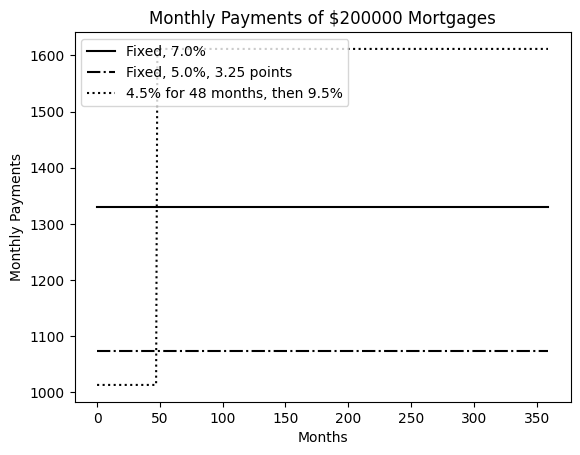

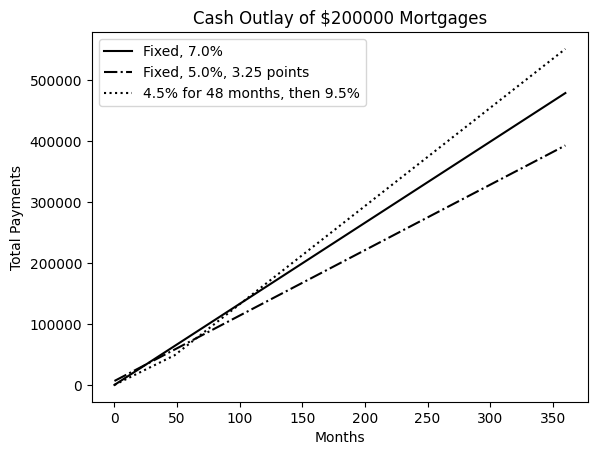

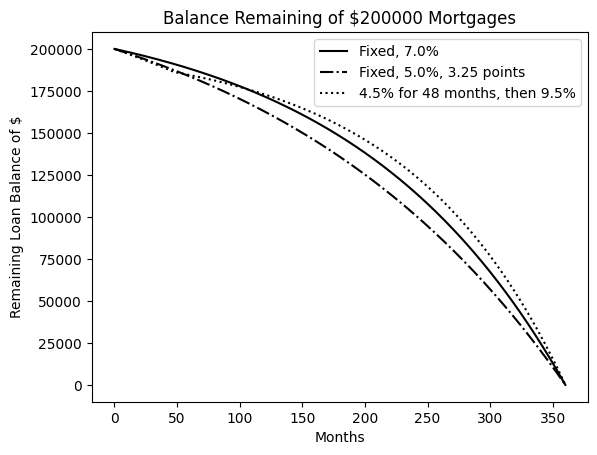

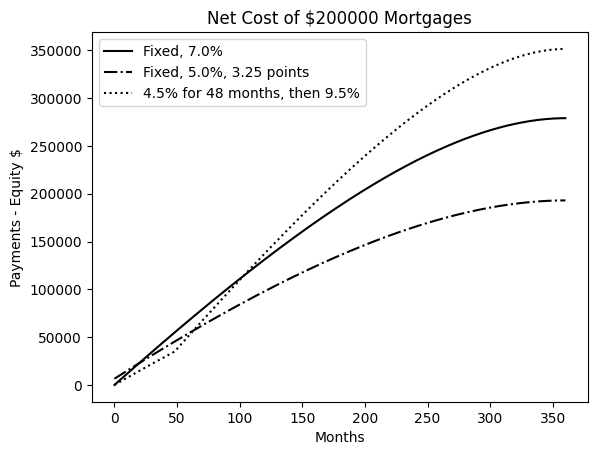

In [16]:
compareMortgages(amt=200000, 
                 years=30, 
                 fixedRate=0.07, 
                 pts = 3.25, 
                 ptsRate=0.05, 
                 varRate1=0.045, 
                 varRate2=0.095, 
                 varMonths=48)
